# Binary classification based on 3 layers neural network

- This is given by Professor

In [116]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision
import os
import sys

from scipy.special import xlogy

import matplotlib.pyplot as plt
import numpy as np
import time


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])

 
#train_data_path = 'relative path of training data set'
train_data_path = 'C:\\중앙대 수업자료\\MachineLearningProject\\horse-or-human\\horse-or-human\\train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = 'C:\\중앙대 수업자료\\MachineLearningProject\\horse-or-human\\horse-or-human\\validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  


- This is given by Professor

In [118]:
train_labels=np.zeros(1027)
test_labels=np.zeros(256)

train_datas=np.zeros((1027,10000))
test_datas=np.zeros((256,10000))



for epoch in range(1):
    sum=0
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        inputs, labels = data
        train_labels[i]=int(labels)
        reinputs=inputs.reshape(10000)
        reinputs=np.array(reinputs)
        train_datas[i]=reinputs
        
    train_datas=train_datas.T

    for i, data in enumerate(valloader):
        sum+=1
        inputs, labels = data
        test_labels[i]=int(labels)
        reinputs=inputs.reshape(10000)
        reinputs=np.array(reinputs)
        test_datas[i]=reinputs

    test_datas=test_datas.T

        
    
    

- for calculating Accuracy of labels

In [119]:
def accuracy_func(h_,label):
    label_result=np.zeros(len(h_))
    correct=0
    for i in range(len(label)):
        if(h_[i]<0.5):
            label_result[i]=0
        elif(h_[i]>=0.5):
            label_result[i]=1
            
        if(label_result[i]==label[i]):
            correct+=1
    total= correct/len(label)
    
    return total

np.set_printoptions(threshold=sys.maxsize)

- set Array and epoch number of train and validation.

In [251]:
NUM_EPOCH=10000

total_loss=np.zeros(NUM_EPOCH)
total_loss_test=np.zeros(NUM_EPOCH)

accuracy=np.zeros(NUM_EPOCH)
accuracy_test=np.zeros(NUM_EPOCH)

known_data1=np.random.randn(10000,10)
known_data2=np.random.randn(10,3)
known_data3=np.random.randn(3,1)

b_1=np.random.randn(10,1)
b_2=np.random.randn(3,1)
b_3=np.random.randn(1,1)


- Optimization in 3 Layers
- Vertorizing Logistic Regression'c gradient Computation in 3 Layers
- Vectorizing Across Multiple
- Neural Network Representations
- known_data1 => 10000 x 10 , known_data2 => 10 x 3 ,known_data3 => 3 x 1

In [252]:

l_rate=0.085

delta = 1e-70
for i in range(NUM_EPOCH):
    #Vectorizing Logistic Regression for train_set
    z1=known_data1.T@train_datas+b_1 #10x1027 =a
    A1=1.0/(1+np.exp(-z1)) 
    z2=known_data2.T@A1 +b_2 #3x1027=b
    A2=1.0/(1+np.exp(-z2))
    z3=known_data3.T@A2+b_3 #1x1027=c
    A3=1.0/(1+np.exp(-z3))
    
    
    #Vectorizing Logistic Regression for validation_set
    z1_v=known_data1.T@test_datas+b_1 #10x256=a
    A1_v=1.0/(1+np.exp(-z1_v)) 
    z2_v=known_data2.T@A1_v+b_2 #3x256=b
    A2_v=1.0/(1+np.exp(-z2_v))
    z3_v=known_data3.T@A2_v+b_3 #1x256=c
    A3_v=1.0/(1+np.exp(-z3_v))
        
    j=-(xlogy(train_labels,A3)+xlogy(1-train_labels,1-A3)).sum()/1027
    j_v=-(xlogy(test_labels,A3_v)+xlogy(1-test_labels,1-A3_v)).sum()/256
    
    L_3=A3-train_labels #1027
    dL_3=(A2@L_3.T)/1027
    known_data3-=l_rate*dL_3
    b3=np.sum(L_3,axis=1,keepdims=True)/1027
    
    L_3=L_3.reshape(1027,1)
    L_2=known_data3@L_3.T*((1-A2)*A2) #3x1027
    dL_2=(A1@L_2.T)/1027
    known_data2-=l_rate*dL_2
    b2=np.sum(L_2,axis=1,keepdims=True)/1027
    
    
    L_1=known_data2@L_2*((1-A1)*A1) #10x1027
    dL_1=(train_datas@L_1.T)/1027
    known_data1-=l_rate*dL_1
    b1=np.sum(L_1,axis=1,keepdims=True)/1027

    
    
    total_loss[i]=j  
    A3=A3.reshape(1027)
    accuracy[i]=accuracy_func(A3,train_labels)
    
    A3_v=A3_v.reshape(256)
    total_loss_test[i]=j_v
    accuracy_test[i]=accuracy_func(A3_v,test_labels)
    

- Plot the loss of Train and Validation at every iteration

Text(0.5, 0, 'Iteraion')

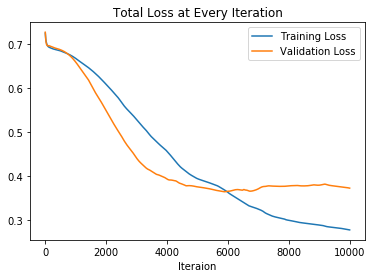

In [253]:
plt.plot(total_loss,label='Training Loss')
plt.plot(total_loss_test,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Total Loss at Every Iteration")
plt.xlabel("Iteraion")

- Plot the Accuracy of Train and Validation 

Text(0.5, 0, 'Iteraion')

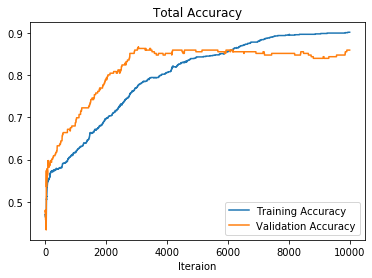

In [260]:
plt.plot(accuracy,label='Training Accuracy')
plt.plot(accuracy_test,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Total Accuracy")
plt.xlabel("Iteraion")

- Present the table for the final accuracy and loss with training and validation datasets
- Accuracy multiply 100 to present as a persent(%)

In [255]:
print("""
+-----------------------+-----------------------+--------------------+
|       Data set        |          Loss         |      Accuracy      |
+-----------------------+-----------------------+--------------------+
|       Training        |          %6.3f        |      %6.2f %%     |
+-----------------------+-----------------------+--------------------+
|      Validation       |          %6.3f        |      %6.2f %%     |
+-----------------------+-----------------------+--------------------+"""
%(total_loss[NUM_EPOCH-1],accuracy[NUM_EPOCH-1]*100,total_loss_test[NUM_EPOCH-1],accuracy_test[NUM_EPOCH-1]*100))


+-----------------------+-----------------------+--------------------+
|       Data set        |          Loss         |      Accuracy      |
+-----------------------+-----------------------+--------------------+
|       Training        |           0.277        |       90.17 %     |
+-----------------------+-----------------------+--------------------+
|      Validation       |           0.372        |       85.94 %     |
+-----------------------+-----------------------+--------------------+



           ^                  ^           
           ´                  `          
         @             ∀        @        
                                          
         Creat by YoungMin Kim :)         
    <     Student ID: 20166450        >  
       Contact: kimym7418@gmail.com       
                                          
